In [3]:
# Below code found at https://github.com/jupyterlite/jupyterlite/issues/119
import pandas as pd 
import micropip
package_url = "https://raw.githubusercontent.com/innovationOUtside/ouseful_jupyterlite_utils/main/ouseful_jupyterlite_utils-0.0.1-py3-none-any.whl"
await micropip.install(package_url)

from ouseful_jupyterlite_utils import pandas_utils as pdu

# use this approach if CSV data is at a remote URL
# Via @jtpio
URL = "https://raw.githubusercontent.com/edgecollective/wastewater-parse/main/waste.csv"
df = await pdu.read_csv_url(URL, ",")


In [4]:
df

,Date,Southern,Northern,Southern_7,Northern_7,Southern_low,Southern_high,Northern_low,Northern_high,Southern_variant,Northern_variant
0,3/1/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3/2/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3/3/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3/4/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3/5/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
744,3/15/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
745,3/16/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
746,3/17/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
747,3/18/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
import matplotlib.pyplot as plt
import datetime as dt

region = 'Northern'
dates=df['Date'].to_numpy()
counts=df[region].to_numpy()


In [15]:
x=[]
y=[]
for i in range(0,len(dates)):
    this_date = dates[i]
    this_count = str(counts[i])
    if (len(this_count)>0) and (this_count != 'nan') and (len(this_count.split(" "))==1):
        if (len(this_date.split(" "))==1):
            d = dt.datetime.strptime(this_date,'%m/%d/%Y').date()
            x.append(d)
            y.append(int(this_count))

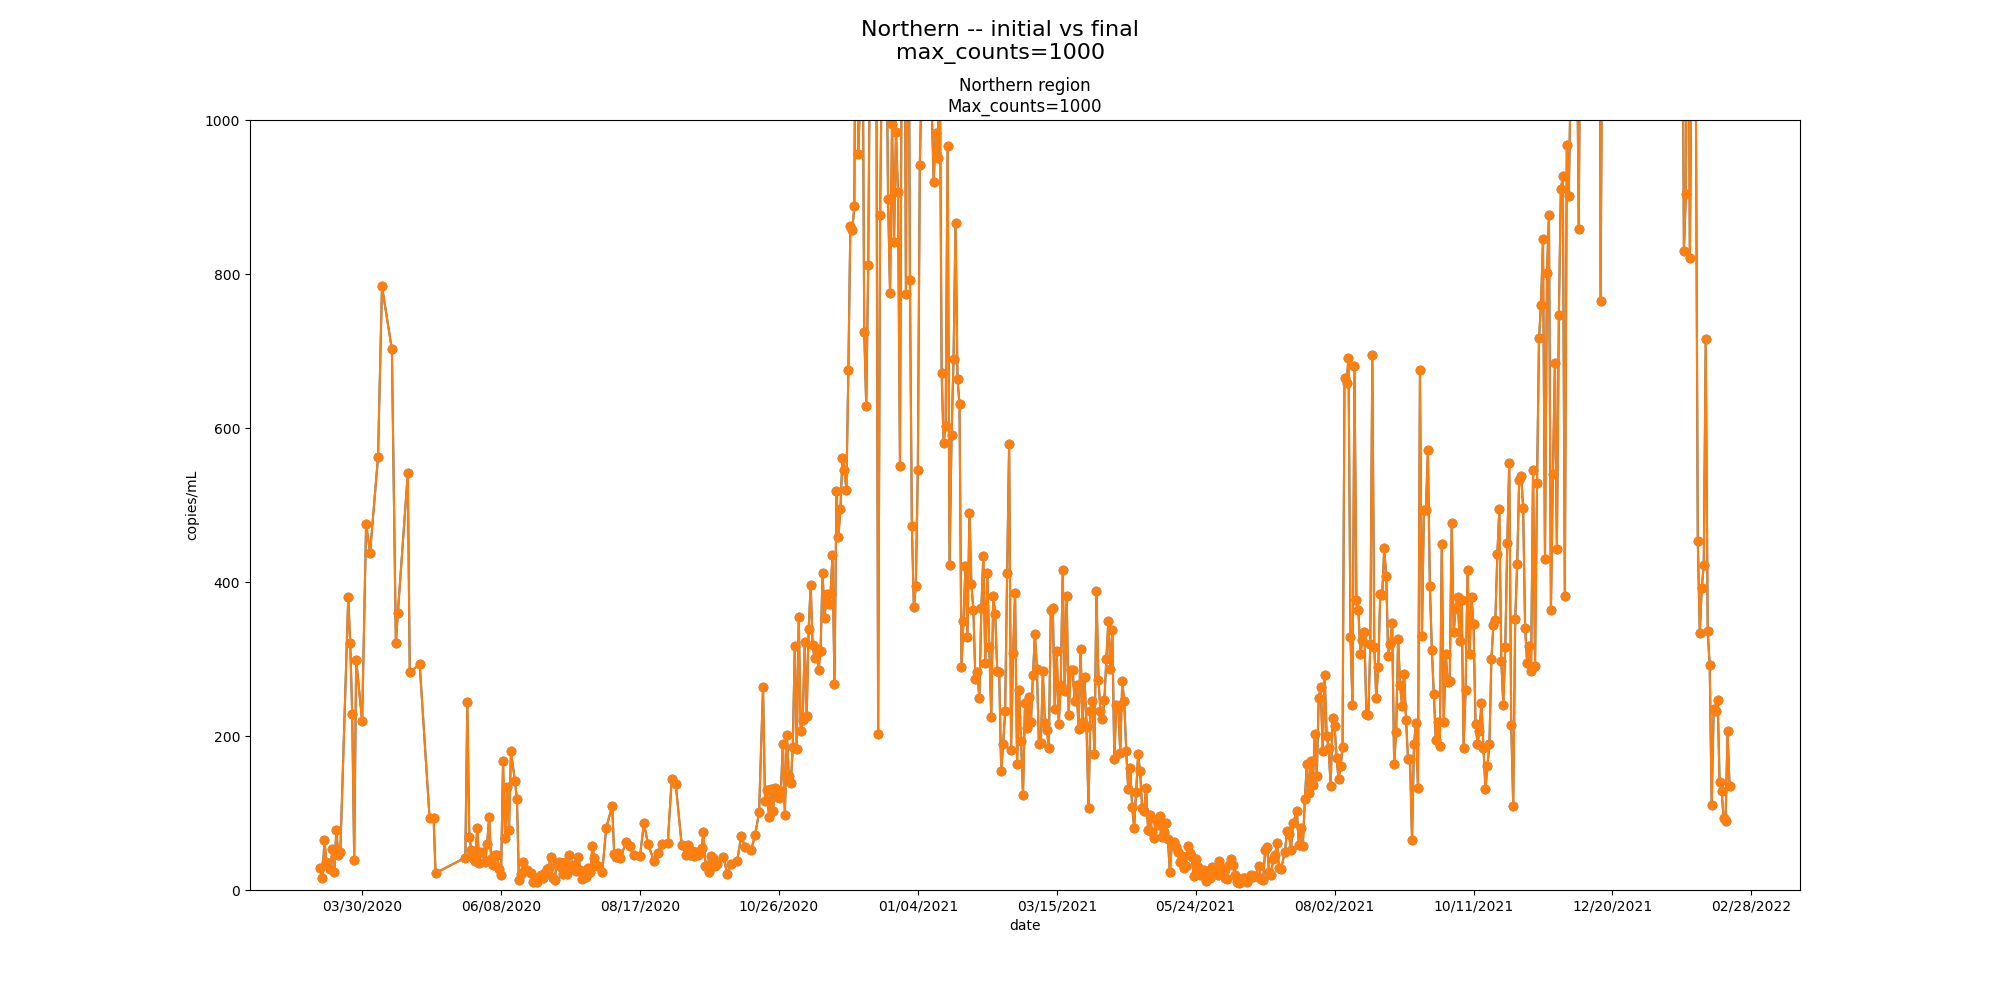

In [17]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d/%Y'))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=(0), interval=10))

max_counts = 1000
#head=400
tail=300

# plot intial
#plt.subplot(1, 2, 1)
#plt.plot(x[len(x)-tail:],y[len(x)-tail:],'-o')
plt.plot(x,y,'-o')
plt.ylim([0,max_counts])
plt.ylabel('copies/mL')
plt.xlabel('date')
plt.title(region+' region\nMax_counts='+str(max_counts))
#plt.show()
fig = plt.gcf()
fig.set_size_inches(20, 10)
fig.suptitle(region +' -- initial vs final\nmax_counts='+str(max_counts), fontsize=16)

#filename=region+'_full_limit_'+str(max_counts)+'_tail.pdf'
#plt.savefig('graphs/'+filename)
plt.show()